In [1]:
from Class_PINN_FBPINN import *
import matplotlib.pyplot as plt
import pickle

c:\Users\C097\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on  cuda


In [2]:
torch.cuda.is_available()

True

### Increasing number of subdomains and layers in PINN for multi-scale problem

In [13]:
# Parameters
domain = [-2*np.pi, 2*np.pi]


# w_list = [2, 4, 8, 16, 32]
w_list = [2, 4, 8]
n_multi_scale = len(w_list)
overlap = 0.3
sigma = 0.1
n_hidden_layers = 4
neurons = 64

#n_subdomains = 30

num_points = 200*15
# n_epochs = 10000
n_epochs = 50000

n_subdomains = [10,30,50,100]
# n_subdomains = [10, 30, 50, 100]

# n_subdomains = [1]

In [14]:
l1_loss_arr = []
l1_loss_min = []
loss_domains = []

In [15]:
# w_list = [1]
# num_points = 200
# n_multi_scale = len(w_list)
# n_subdomains = [2]
# overlap = 1.3
# # n_epochs = 10000
# n_epochs = 10000

In [16]:
def plot_solution(model, sub_domain):
    fig = plt.figure(figsize=(10, 5))
    # Plot the exact solution
    x = torch.linspace(domain[0], domain[1], num_points, dtype=torch.float32, device=DEVICE).reshape(-1, 1)
    u_exact = model.exact_solution(x)

    plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact', color="blue")

    # Plot the FBPINN solution
    for i in range(model.n_subdomains):

        u_approx = torch.tanh(model.w_list[-1] * x) * model(x)  

        plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), color="green")
    # Add label only once
        if i == 0:
            plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='FBPINN', color="green")
            
    plt.title('FBPINN Nr subdomains: {}'.format(sub_domain))
    plt.legend()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u$')
    plt.savefig("fig_scaling/fig_{}_{}.pdf".format(len(w_list), sub_domain))
    plt.show()

In [17]:
for nr_sub in n_subdomains:

    # Create the model
    model = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=nr_sub, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)

    # Train the FBPINN
    # model.to(mps_device)
    history, l1_loss = model.fit(num_points, n_epochs, verbose=True)

    l1_loss_arr.append(l1_loss)

    print("Loss: {}".format(np.min(l1_loss)))

    l1_loss_min.append(np.min(l1_loss))

    plot_solution(model, nr_sub)

    torch.save(model.state_dict(), 'models_save/scale_fbpinn_{}_{}.pdh'.format(len(w_list), nr_sub))

    # Save the l1 loss in pickle
    with open("l1_loss_scale_fbpinn_{}_{}".format(len(w_list), nr_sub), 'wb') as file:
        pickle.dump(l1_loss, file)

Epoch :  0 	 Loss:  43.591285705566406 	 Epoch_time:  0  s
Epoch :  100 	 Loss:  34.9387321472168 	 Epoch_time:  0  s
Epoch :  200 	 Loss:  34.476593017578125 	 Epoch_time:  0  s
Epoch :  300 	 Loss:  34.30754470825195 	 Epoch_time:  0  s
Epoch :  400 	 Loss:  34.15704345703125 	 Epoch_time:  0  s
Epoch :  500 	 Loss:  33.97787857055664 	 Epoch_time:  0  s
Epoch :  600 	 Loss:  33.76054763793945 	 Epoch_time:  0  s
Epoch :  700 	 Loss:  33.48333740234375 	 Epoch_time:  0  s
Epoch :  800 	 Loss:  33.15446472167969 	 Epoch_time:  0  s
Epoch :  900 	 Loss:  32.78077697753906 	 Epoch_time:  0  s
Epoch :  1000 	 Loss:  32.38330841064453 	 Epoch_time:  0  s
Epoch :  1100 	 Loss:  31.99915885925293 	 Epoch_time:  0  s
Epoch :  1200 	 Loss:  31.619182586669922 	 Epoch_time:  0  s
Epoch :  1300 	 Loss:  31.25821876525879 	 Epoch_time:  0  s
Epoch :  1400 	 Loss:  30.916345596313477 	 Epoch_time:  0  s
Epoch :  1500 	 Loss:  30.636499404907227 	 Epoch_time:  0  s
Epoch :  1600 	 Loss:  30.306810

In [8]:
len(history)

48

In [9]:
history

[0.5138595700263977,
 0.4992067515850067,
 0.4917961657047272,
 0.48620033264160156,
 0.4807687997817993,
 0.47518202662467957,
 0.46944716572761536,
 0.4637770354747772,
 0.45828160643577576,
 0.45334896445274353,
 0.44904661178588867,
 0.4452778100967407,
 0.4418672025203705,
 0.43864476680755615,
 0.43540239334106445,
 0.43204307556152344,
 0.42861154675483704,
 0.4252760112285614,
 0.4220753312110901,
 0.41909530758857727,
 0.41623517870903015,
 0.41349032521247864,
 0.4108520448207855,
 0.4082125723361969,
 0.4056505858898163,
 0.40318968892097473,
 0.4008921682834625,
 0.3987749516963959,
 0.39685142040252686,
 0.3950647711753845,
 0.3933700621128082,
 0.39174404740333557,
 0.3901687264442444,
 0.3886567950248718,
 0.38726988434791565,
 0.385949045419693,
 0.3847091495990753,
 0.3835436999797821,
 0.38242247700691223,
 0.3813522756099701,
 0.3803088665008545,
 0.37936079502105713,
 0.3784486651420593,
 0.3776313364505768,
 0.37686148285865784,
 0.3761380612850189,
 0.375443100929

In [ ]:
model_test = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=1, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)
model_test.load_state_dict(torch.load("models_save/scale_fbpinn_1.pdh"))
# model_test.eval()


<All keys matched successfully>

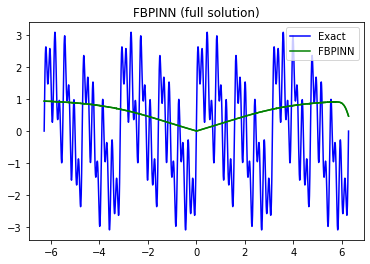

In [ ]:
plot_solution(model_test) 

### PINN Solution

In [ ]:
num_points = 200*15
n_epochs = 50000

l1_loss_pinn_arr = []
l1_loss_pinn_min = []
loss_pinns_layers = []

In [ ]:
def plot_solution_pinn(model, nr_layers):
    fig = plt.figure(figsize=(10, 5))
    model.eval()
    # test points
    x = torch.linspace(-2*torch.pi, 2*torch.pi, num_points, dtype=torch.float32, device=DEVICE, requires_grad=True).reshape(-1, 1)   # the input has to be of shape (n, 1)

    # Evaluate the exact solution
    u_exact = model.exact_solution(x)

    # Evaluate the approximate solution
    u_approx = torch.tanh(model.w_list[1] * model.normalize_input(x)) * model.unnormalize_output( model( model.normalize_input(x)) )

    # Resale the approximate solution to the same scale as the exact solution
    u_approx = model.restore_output(u_approx)

    #Plot
    
    plt.plot(x.cpu().detach().numpy(), u_exact.cpu().detach().numpy(), label='Exact Solution')
    plt.plot(x.cpu().detach().numpy(), u_approx.cpu().detach().numpy(), label='PINN')
    plt.title('PINN ({} layers)'.format(nr_layers))
    plt.legend()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$u$')
    plt.savefig("fig_scaling/fig_pinn_{}_{}.pdf".format(len(w_list), nr_layers))
    plt.show()

    plt.show()

In [ ]:
# domain_extrema = [-2*np.pi, 2*np.pi]

# n_multi_scale = 2
# w_list = [1, 15]
# n_hidden_layers = 5
# neurons = 128
# activation_function = nn.Tanh()


n_hidden_layers = [2, 3, 5, 8]

for nr_lay in n_hidden_layers:

    # Create the model      
    model = PINN_Cos_nD(domain, n_hidden_layers, neurons, activation_function=nn.Tanh(), n_multi_scale = n_multi_scale, w_list=w_list)

    optimizer_ADAM = optim.Adam(model.parameters(),
                                lr=float(0.001))

    history, l1_loss_pinn = model.fit(num_points, optimizer_ADAM, n_epochs, verbose=False)

    l1_loss_pinn_arr.append(l1_loss_pinn)
    
    print("Loss: {}".format(np.min(l1_loss)))
    l1_loss_pinn_min.append(np.min(l1_loss))

    torch.save(model.state_dict(), 'models_save/scale_pinn_{}_{}.pdh'.format(len(w_list), nr_lay))

    with open("l1_loss_scale_pinn_{}_{}".format(len(w_list), nr_lay), 'wb') as file:
        pickle.dump(l1_loss_pinn, file)

In [ ]:
model = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=nr_sub, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)

# Train the FBPINN
# model.to(mps_device)
history, l1_loss = model.fit(num_points, n_epochs, verbose=False)



plot_solution(model, nr_sub)


# Save the l1 loss in pickle


In [ ]:
# Parameters
# domain = [-2*torch.pi, 2*torch.pi]

# n_multi_scale = 3
# w_list = [1, 4, 15]
# n_subdomains = 30
# overlap = 0.3
# sigma = 0.1
# n_hidden_layers = 2
# neurons = 16

# # Create the model
# fbpinn = FBPINN_Cos_nD(domain_extrema=domain, n_subdomains=n_subdomains, overlap=overlap, sigma=sigma, n_hidden_layers=n_hidden_layers, neurons=neurons, activation_function=nn.Tanh(), n_multi_scale=n_multi_scale, w_list=w_list)

# # Train the FBPINN
# num_points = 200*15
# n_epochs = 10000

# history = fbpinn.fit(num_points, n_epochs, verbose=False)

AttributeError: module 'torch' has no attribute 'pi'